In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
file = open('./Modeling.log', 'r')
raw_data = file.read()

In [3]:
vect = []
model = []

methods = re.findall(r'using (.+) and (.+)\s.+', raw_data)
for method in methods:
    vect.append(method[0])
    model.append(method[1])

In [4]:
fit_num = []
time  = []
unit = []

time_data = re.findall(r'of\s+(\d+).+\s+(\d+\.?\d+)(\w+) finished', raw_data)
for data in time_data:
    fit_num.append(int(data[0]))
    time.append(float(data[1]))
    unit.append(data[2])

In [5]:
df = pd.DataFrame({'Vectorizer': vect, 'Classifier': model, 'fit_num': fit_num, 'duration': time, 'unit': unit})
df.head()

,Vectorizer,Classifier,fit_num,duration,unit
0,CountVectorizer,LogisticRegression,400,6.8,min
1,CountVectorizer,KNeighborsClassifier,120,6.2,min
2,CountVectorizer,MultinomialNB,20,11.9,s
3,CountVectorizer,RandomForestClassifier,180,83.3,min
4,CountVectorizer,AdaBoostClassifier,60,3.3,min


In [6]:
mask = df['unit'] == 'min'
df.loc[mask, 'duration_per_fit'] = df.loc[mask, 'duration'] * 60
df.loc[~mask, 'duration_per_fit'] = df.loc[~mask, 'duration']
df['duration_per_fit'] = df['duration_per_fit'] / df['fit_num']
df.head()

,Vectorizer,Classifier,fit_num,duration,unit,duration_per_fit
0,CountVectorizer,LogisticRegression,400,6.8,min,1.020000
1,CountVectorizer,KNeighborsClassifier,120,6.2,min,3.100000
2,CountVectorizer,MultinomialNB,20,11.9,s,0.595000
3,CountVectorizer,RandomForestClassifier,180,83.3,min,27.766667
4,CountVectorizer,AdaBoostClassifier,60,3.3,min,3.300000


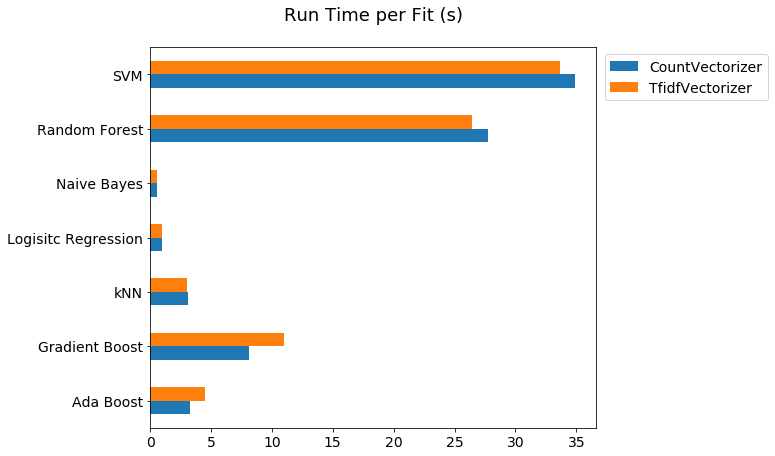

In [7]:
fig, ax = plt.subplots(figsize=(8, 7))
df.pivot_table(index=['Classifier', 'Vectorizer'])['duration_per_fit'].unstack().plot(kind='barh', ax=ax)
labels = ['Ada Boost', 'Gradient Boost', 'kNN', 'Logisitc Regression', 'Naive Bayes', 'Random Forest', 'SVM']
ax.set_yticklabels(labels)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.set_ylabel(None)
ax.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_title('Run Time per Fit (s)\n', fontsize=18);